## Metrics are observed across time. Metrics are calculated separately at specific points in time, but are understood in a chronological context.

* ## What makes a good metric?
* Accurate
* Simple and intelligible
* Easy to drill down into
* Actionable
* Dynamic
* Standardized
* Business oriented


------------------------------------------------------------------------------------
*    You work as a stockbroker in a country where there's a quarterly-revised, government-imposed industry tax rate on your company's profits. Is this tax-rate a good metric to monitor? No

*    You work in the admissions office of a reputable university and you have veto power. Consider the metric the number of students whose first name starts with "B".
     *   Is it a relevant metric? No
     *   Is it an actionable metric? Yes

# Net Promoter Score
## NPS is a customer sucess metric that quantifies customer satisfaction.

In [1]:
def categorize(score):
    if score >= 0 and score <= 6:
        return "Detractor"
    elif score == 7 or score == 8:
        return "Passive"
    elif score == 9 or score == 10:
        return "Promoter"
    return None

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
df = pd.read_csv("nps.csv", parse_dates=["event_date"])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


### Metrics are tracked across time. month by month 

In [4]:
df.shape

(3326, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_date  3326 non-null   datetime64[ns]
 1   user_id     3326 non-null   int64         
 2   score       3326 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB


In [6]:
df['yearmonth'] = df.event_date.dt.strftime("%Y%m").astype("int")
df['category'] = df.score.apply(categorize)

In [7]:
df.head()

,event_date,user_id,score,yearmonth,category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoter
2,2020-01-02 19:11:55,187864388,10,202001,Promoter
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detractor


In [8]:
df.groupby(['yearmonth', 'category'])['category'].size()

yearmonth  category 
202001     Detractor     31
           Passive       82
           Promoter     215
202002     Detractor     22
           Passive       90
           Promoter     161
202003     Detractor     33
           Passive       72
           Promoter     125
202004     Detractor     36
           Passive       87
           Promoter     178
202005     Detractor     33
           Passive       83
           Promoter     191
202006     Detractor     32
           Passive       80
           Promoter     215
202007     Detractor     48
           Passive       95
           Promoter     258
202008     Detractor     40
           Passive      103
           Promoter     256
202009     Detractor     18
           Passive       68
           Promoter     135
202010     Detractor     36
           Passive       83
           Promoter     177
202011     Detractor     18
           Passive       27
           Promoter      72
202012     Detractor     22
           Passive       42

In [9]:
nps = df.pivot_table(index = 'yearmonth', columns= 'category', aggfunc='size')
nps

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


In [10]:
nps['total_responses'] = nps[['Detractor', 'Passive', 'Promoter']].sum(axis = 1)

In [11]:
nps

category,Detractor,Passive,Promoter,total_responses
yearmonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


In [12]:
nps['nps'] = (nps.Promoter - nps.Detractor) / nps.total_responses
nps.nps = (nps.nps * 100).astype('int')
nps

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51
202006,32,80,215,327,55
202007,48,95,258,401,52
202008,40,103,256,399,54
202009,18,68,135,221,52


Text(0.5, 0, '')

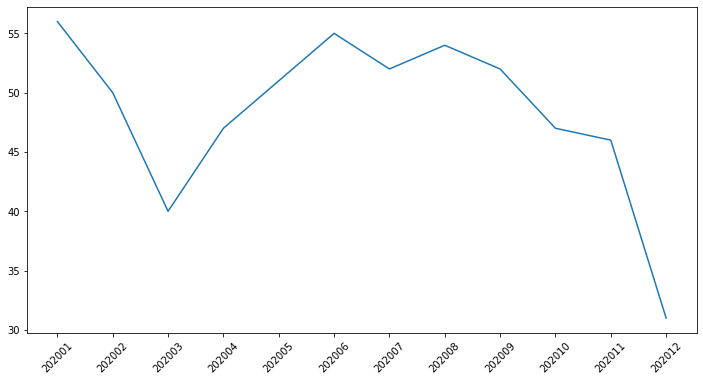

In [13]:
ax = nps.reset_index().plot(kind = 'line', x = 'yearmonth', y = 'nps', figsize=(12,6), legend=False)
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation = 45)
ax.axes.get_xaxis().set_label_text("")

## Customer survey for score of satisfaction
## * Pros
* Accurate, simple and intelligible, easy to drill down into (we know the score of every customer), dynamic...
## * Cons include:

*    Requiring feedback from customers for it to be actionable — and most customers don't give feedback.
*    It doesn't account for the influence of each respondent, or the influence of each category of respondents. Perhaps unsatisfied customers are more likely to voice their unhappiness on social media than promoters are to voice how happy they are, for instance.


# Churned rate
* Churn rate is the percentage of customers that churned in a given time period

In [14]:
# Create a dataset that tracks the number of churned customers per month
subs = pd.read_csv('muscle_labs.csv', parse_dates=['end_date', 'start_date'])
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [15]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


In [16]:
subs['churn_month']= subs.end_date.dt.strftime('%Y%m').astype('int')
subs.sample(5)

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
7972,201,9870,2015-11-17 16:10:08,2014-11-15 03:39:37,annual,500,201511
4590,15917,6354,2015-01-03 07:19:00,2014-08-01 19:19:00,monthly,50,201501
5240,26624,7019,2014-07-16 21:37:00,2014-05-16 21:37:00,monthly,50,201407
2902,6678,4157,2014-12-09 15:41:45,2013-12-06 03:41:45,annual,500,201412
3908,14167,5651,2015-04-16 08:56:00,2014-04-13 20:56:00,annual,500,201504


In [17]:
monthly_churn = pd.DataFrame(subs.groupby('churn_month').size(), columns=['total_churned'])
monthly_churn = pd.DataFrame({"total_churned" : subs.groupby('churn_month').size()})

In [18]:
print(subs.start_date.min())

2011-01-05 13:55:00


* You may have noticed that our data in monthly_churn starts at March 2011. Given the above result, we conclude that we're missing at least two months. On the previous screen, we mentioned that the current month is December 2014.

In [19]:
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [20]:
# Since we are in the beginning of Dec of 2014, we still don't have all the data for the current month.
# Get rid of the last entry 
yearmonths = yearmonths[:-1]
churn = pd.DataFrame({'yearmonth':yearmonths})
churn.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [21]:
# Populate dataframe wiht the data in monthly_churn
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [22]:
churn = pd.merge(left = churn, right = monthly_churn, left_on = 'yearmonth', right_index = True,how='left')
churn.head()

,yearmonth,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [23]:
churn.fillna(0, inplace=True)
churn.total_churned = churn.total_churned.astype('int')
churn.head()

,yearmonth,total_churned
0,201101,0
1,201102,0
2,201103,8
3,201104,16
4,201105,29


## Determine total customers throughout the month as the number of customers at the beginning of the time period. Which is equivalent to finding the number of customers at the end of the previous month.

In [24]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [25]:
def total_customer_begin_month(m):
    # m is an integer representing a month in the format yyyymm
    # return the number of rows in subs satisfying 
    first_day_month = dt.datetime(m//100, m%100, 1)
#    last_day_previous_month = first_day_month - dt.timedelta(days=1)
    day_mask = (subs.start_date < first_day_month) & (subs.end_date >= first_day_month)
    return subs[day_mask].shape[0]

In [26]:
churn['total_customers'] = churn.yearmonth.apply(total_customer_begin_month)
churn.head()

,yearmonth,total_churned,total_customers
0,201101,0,0
1,201102,0,17
2,201103,8,47
3,201104,16,82
4,201105,29,105


In [27]:
churn.tail()

,yearmonth,total_churned,total_customers
42,201407,88,4150
43,201408,114,4521
44,201409,152,5038
45,201410,126,5599
46,201411,159,6290


In [28]:
churn['churn_rate'] = churn.total_churned / churn.total_customers
churn.sample(5)

,yearmonth,total_churned,total_customers,churn_rate
23,201212,50,607,0.082372
1,201102,0,17,0.000000
31,201308,92,1111,0.082808
22,201211,45,586,0.076792
38,201403,67,2426,0.027617


In [29]:
# Set yearmonth as a string type
churn.yearmonth = churn.yearmonth.astype('str')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yearmonth        47 non-null     object 
 1   total_churned    47 non-null     int64  
 2   total_customers  47 non-null     int64  
 3   churn_rate       46 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [30]:
churn.tail()

,yearmonth,total_churned,total_customers,churn_rate
42,201407,88,4150,0.021205
43,201408,114,4521,0.025216
44,201409,152,5038,0.030171
45,201410,126,5599,0.022504
46,201411,159,6290,0.025278


churn.plot(x='yearmonth', y = 'churn_rate', rot = 45, marker='.')

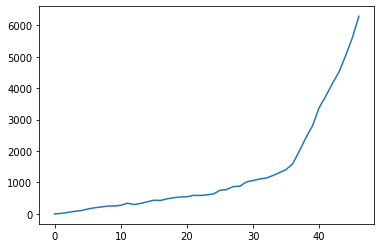

In [32]:
churn.total_customers.plot()

### Plot data

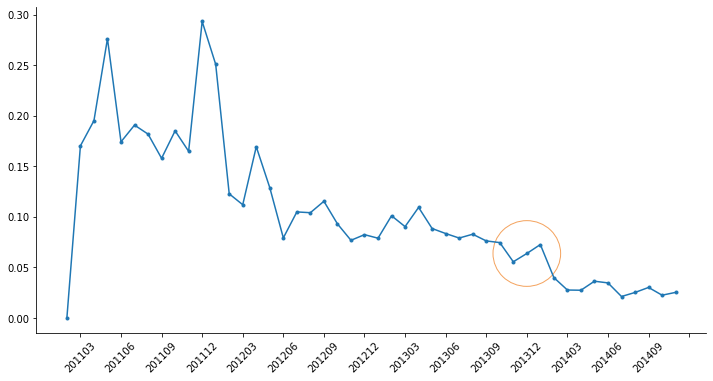

In [35]:
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x='yearmonth', y='churn_rate', figsize=(12,6), rot=45, marker='.')
start,end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2,end,3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == '201312', 'churn_rate'].iloc[0]), 
                5, 0.065, color = 'sandybrown', fill = False)
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()
plt.show()

* The churn rate is very erratic at the beginning
* In the months prior to you taking over the business in Jan of 2013, the churn rate started to become more stable
* After you took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.
* At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate.

In [36]:
churn.head()

,yearmonth,total_churned,total_customers,churn_rate
0,201101,0,0,NaN
1,201102,0,17,0.000000
2,201103,8,47,0.170213
3,201104,16,82,0.195122
4,201105,29,105,0.276190


In [37]:
churn.tail()

,yearmonth,total_churned,total_customers,churn_rate
42,201407,88,4150,0.021205
43,201408,114,4521,0.025216
44,201409,152,5038,0.030171
45,201410,126,5599,0.022504
46,201411,159,6290,0.025278


## Monthly subscriptions


In [38]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [44]:
def subscribe_number_month(m):
    # Subscribe numbers during the month m yyyymm
    year, month = m//100, m%100
    start_m = dt.datetime(year, month, 1)
    if month == 12:
        year += 1
        month = 0
    end_m = dt.datetime(year, month+1, 1) - dt.timedelta(days=1)
    row_subscribe = (subs.start_date >= start_m) & (subs.start_date <= end_m)
    return row_subscribe.sum()

In [46]:
churn.yearmonth = churn.yearmonth.astype('int')
churn['monthly_subsribe_total'] = churn.yearmonth.apply(subscribe_number_month)
churn.head()

,yearmonth,total_churned,total_customers,churn_rate,monthly_subsribe_total
0,201101,0,0,NaN,17
1,201102,0,17,0.000000,28
2,201103,8,47,0.170213,42
3,201104,16,82,0.195122,39
4,201105,29,105,0.276190,79


In [47]:
churn.tail()

,yearmonth,total_churned,total_customers,churn_rate,monthly_subsribe_total
42,201407,88,4150,0.021205,417
43,201408,114,4521,0.025216,614
44,201409,152,5038,0.030171,659
45,201410,126,5599,0.022504,799
46,201411,159,6290,0.025278,934


In [48]:
churn['monthly_rate'] = churn.monthly_subsribe_total / churn.total_customers
churn.tail()

,yearmonth,total_churned,total_customers,churn_rate,monthly_subsribe_total,monthly_rate
42,201407,88,4150,0.021205,417,0.100482
43,201408,114,4521,0.025216,614,0.135811
44,201409,152,5038,0.030171,659,0.130806
45,201410,126,5599,0.022504,799,0.142704
46,201411,159,6290,0.025278,934,0.148490


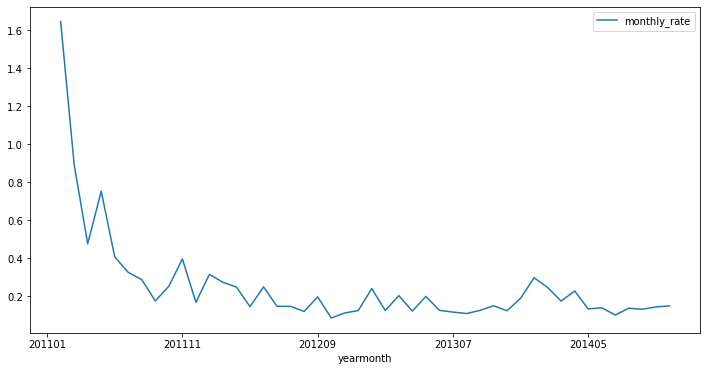

In [53]:
churn.yearmonth = churn.yearmonth.astype('str')
churn.plot(x = 'yearmonth', y = 'monthly_rate', figsize=(12,6))

## * Different from guide, need to recheck!!!